In [620]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, chi2

ModuleNotFoundError: No module named 'utils'

In [577]:
heart_path = "C:\\Users\\gabme\\OneDrive\\Documentos\\projetospython\\heartdisease\\Heart_Disease_Prediction.csv"
heart_csv = pd.read_csv(heart_path)
heart_csv.head() #1 é homem 0 é mulher
#Idade, Gênero, tipo de dor no peito, Pressão sanguínea, Colesterol, Glicose no Sangue em jejum, resultados do
#Eletrocardiograma, Angina,

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [578]:
heart_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [579]:
heart_csv.nunique()

Age                         41
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
Heart Disease                2
dtype: int64

In [580]:
heart_csv.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000


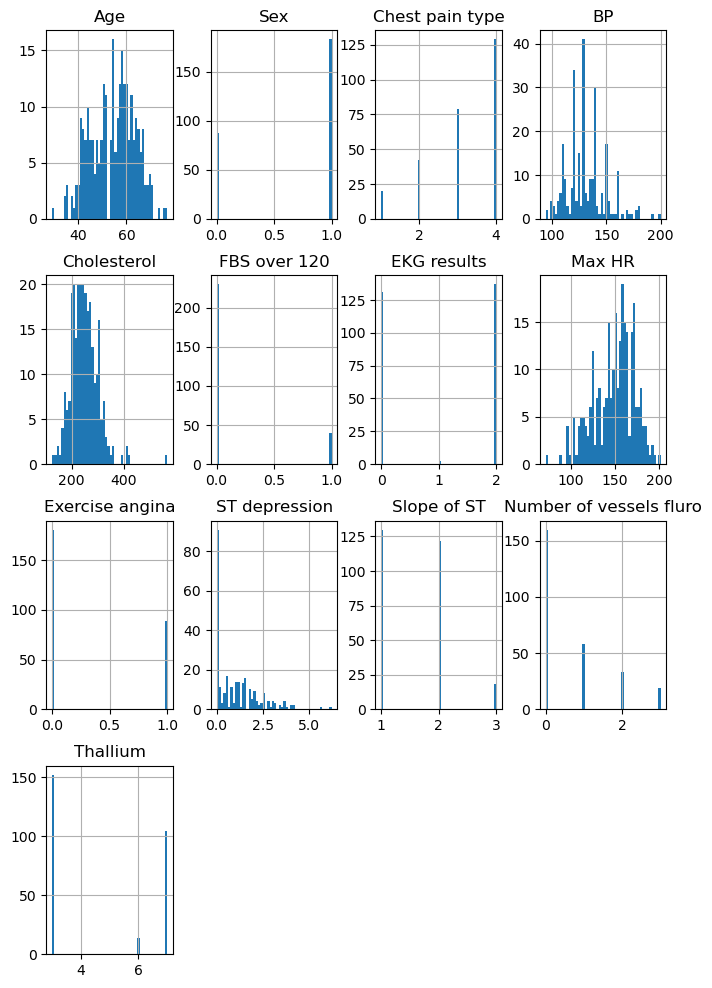

In [581]:
heart_csv.hist(bins=50, figsize=(8,12))
plt.show()

In [582]:
heart_csv['Number of vessels fluro'].unique()

array([3, 0, 1, 2], dtype=int64)

In [583]:
continuum_columns = ['Age', 'BP', 'Cholesterol', 'Max HR', 'ST depression', 'Number of vessels fluro', 'Thallium', 'Slope of ST', 'EKG results']
target_column = ['Heart Disease']
categorical_columns = list(set(heart_csv.columns) - set(continuum_columns) - set(target_column))

target_df = pd.get_dummies(heart_csv[target_column].copy(), drop_first=True)
continuum_df_0 = heart_csv.loc[heart_csv['Heart Disease'] == 'Absence', continuum_columns].copy()
continuum_df_1 = heart_csv.loc[heart_csv['Heart Disease'] == 'Presence', continuum_columns].copy()
categorical_df = heart_csv[categorical_columns].copy()

In [584]:
fisher_score = {}
for column in continuum_columns:
    fisher = ((continuum_df_1[column].mean() - continuum_df_0[column].mean())**2) / ((continuum_df_1[column].std()**2) + (continuum_df_0[column].std()**2))
    fisher_score[column] = fisher

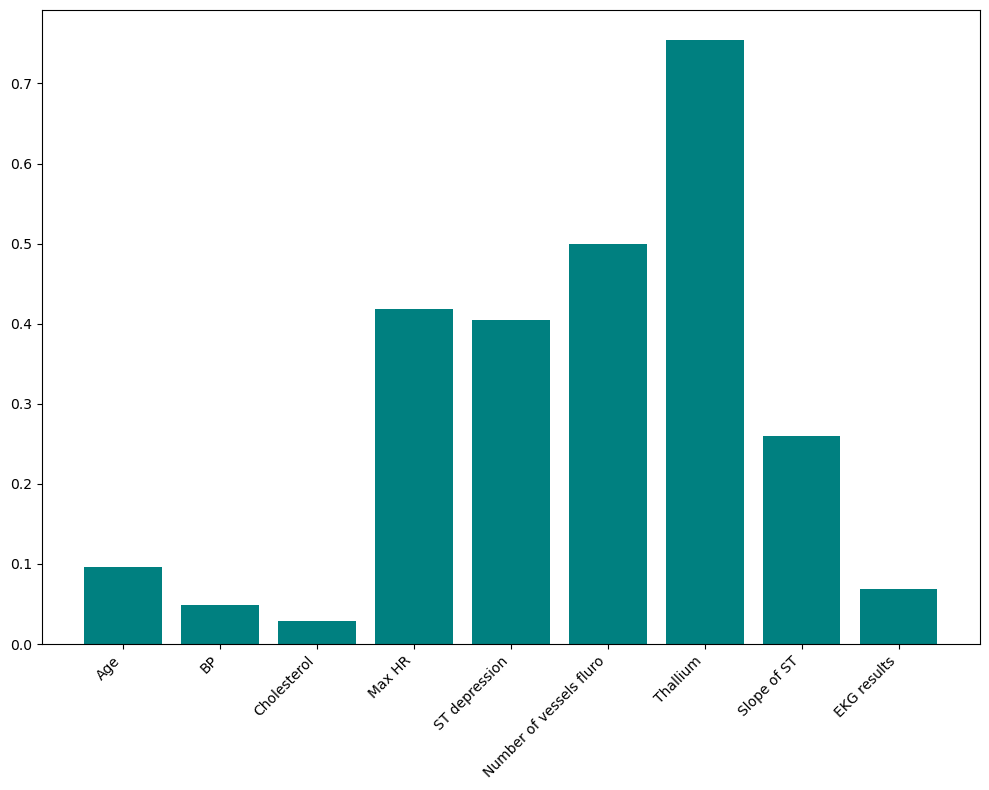

In [585]:
plt.figure(figsize=(10,8))
plt.bar(list(fisher_score.keys()), list(fisher_score.values()), color='teal')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [586]:
chisquare = SelectKBest(score_func=chi2, k=2)
bestfeat = chisquare.fit_transform(categorical_df, target_df)

print(categorical_df.columns[chisquare.get_support()])

Index(['Exercise angina', 'Chest pain type'], dtype='object')


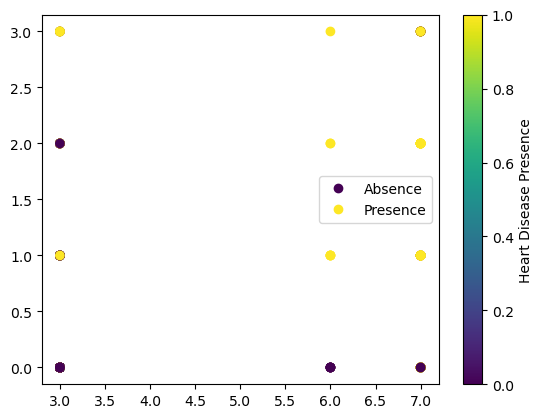

In [621]:
scatter = plt.scatter(x=heart_csv['Thallium'], y=heart_csv['Number of vessels fluro'], c=target_df['Heart Disease_Presence'])
legend_labels = ['Absence', 'Presence']
plt.legend(handles=scatter.legend_elements()[0], labels=legend_labels)
plt.colorbar(scatter, label = "Heart Disease Presence")
plt.show()

<Axes: >

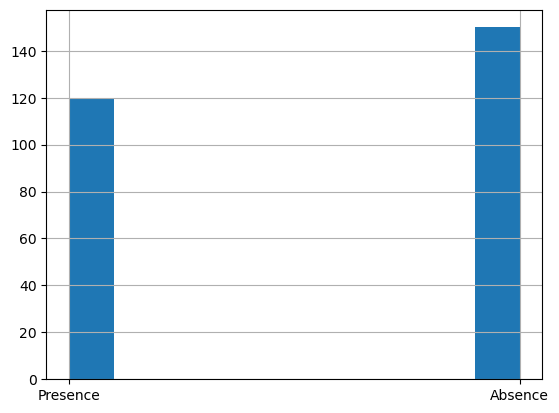

In [588]:
heart_csv['Heart Disease'].hist()

In [589]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(heart_csv, heart_csv['Heart Disease']):
    strat_train_set = heart_csv.loc[train_index]
    strat_test_set = heart_csv.loc[test_index]

In [590]:
strat_train_set['Heart Disease'].value_counts() / len(strat_train_set)

Heart Disease
Absence     0.555556
Presence    0.444444
Name: count, dtype: float64

In [591]:
strat_test_set['Heart Disease'].value_counts() / len(strat_test_set)

Heart Disease
Absence     0.555556
Presence    0.444444
Name: count, dtype: float64

In [592]:
heart_train = strat_train_set.copy()

In [593]:
train_labels = heart_train['Heart Disease']
heart_train = heart_train.drop('Heart Disease', axis=1)

In [594]:
train_labels = pd.get_dummies(train_labels, drop_first=True)
labels_matrix = train_labels.values
type(labels_matrix)

numpy.ndarray

In [595]:
numcol = ['Thallium', 'Number of vessels fluro']

num_transformer = Pipeline([
    ('scaler', StandardScaler())
])

poly_transformer = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
]) 

preprocessor = ColumnTransformer([
    ('poly', poly_transformer, numcol),
    ('num', num_transformer, numcol)
])

pipeline = Pipeline([
    ('fulltransformer', preprocessor)
])

In [596]:
processed_train = pipeline.fit_transform(heart_train)
type(processed_train)

numpy.ndarray

# Machine Learning

In [598]:
def sigmoid(z):
    
    f = 1/(1+np.exp(-z))
        
    return f

In [599]:
def compute_loss(X, y, w, b):
    
    m, n = X.shape
    loss = 0
    
    for i in range(m):
        z_wb = 0
        
        for j in range(n):
        
            z_wb_ij = w[j] * X[i][j]
            z_wb += z_wb_ij
        
        z_wb += b
        
        f_wb = sigmoid(z_wb)
        
        loss_temp = -(y[i]*np.log(f_wb)) - ((1-y[i])*np.log(1-f_wb))
        loss += loss_temp
        
        total_loss = loss/m
        
    return loss

In [600]:
def compute_gradient(X, y, w, b):
    m, n = X.shape
    
    dj_dw = np.zeros(w.shape)
    dj_db = 0
    for i in range(m):
        z_wb = 0
        for j in range(n):
            z_wb_ij = w[j]*X[i][j]
            z_wb += z_wb_ij
        
        z_wb += b
        
        f_wb = sigmoid(z_wb)
        

        for j in range(n):
            dj_dw_ij = (f_wb - y[i])*X[i][j]
            dj_dw[j] += dj_dw_ij
            
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        
    dj_dw /= m
    dj_db /= m
    
    return dj_dw, dj_db

In [615]:
def gradient_descent(X, y, w, b, alpha, num_iters, threshold):
    
    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient(X,y,w,b)
        
        aux_w = w.copy()
        aux_b = b
        
        w -= alpha*dj_dw
        b -= alpha*dj_db
        
        if np.linalg.norm(w-aux_w) < threshold and np.abs(b-aux_b) < threshold:
            break
            
    loss = compute_loss(X, y, w, b)
    return loss, w, b

In [646]:
def predictions(X, w, b):
    m, n = X.shape
    predictions = []
    for i in range(m):
        z_wb = 0
        for j in range(n):
            z_wb_ij = w[j] * X[i][j]
            z_wb += z_wb_ij
        z_wb += b
        f_wb = sigmoid(z_wb)
        
        pred = 1 if f_wb >= 0.48 else 0
        
        predictions.append(pred)
        
    return predictions

In [619]:
rows, columns = processed_train.shape
w_0 = np.zeros(columns)
b_0 = 0.

loss,best_w, best_b = gradient_descent(processed_train, labels_matrix, w_0, b_0, 0.0001, 100000, 0.001)
print(f"Loss function with {best_w} and {best_b}: {loss}")

Loss function with [2.33796296e-05 1.87500000e-05 3.48379630e-04 1.27083333e-04
 4.28240741e-05 2.55009202e-05 2.40192170e-05] and [-5.55555556e-06]: [149.4179174]


In [647]:
predictions = predictions(processed_train, best_w, best_b)
predictions

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]